# Identifying Parisitized Malaria Cells with the LeNet Model (Convolutional Neural Networks)
___

## Task Understanding
See README.md

## Initialization

In [15]:
#Import the necessary modules
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from keras.losses import BinaryCrossentropy
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam


## Data Preperation

In [5]:
#Load the dataset
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train']) #tfds.load returns a tuple of the dataset and the dataset info, here we assign those values to the variables dataset and dataset_info

#Define function to split the dataset into the required ratios for training, validation & testing 
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    DATASET_SIZE = len(dataset)

    train_dataset = dataset.take(int(TRAIN_RATIO * DATASET_SIZE)) #Splits training dataset
    val_test_dataset = dataset.skip(int(TRAIN_RATIO * DATASET_SIZE)) #Splits validation & testing dataset by skipping training dataset
    val_dataset = val_test_dataset.take(int(VAL_RATIO * DATASET_SIZE)) #Splits validation dataset from validation & testing dataset
    test_dataset = val_test_dataset.skip(int(VAL_RATIO * DATASET_SIZE)) #Splits test dataset from validation & testing dataset
    
    return train_dataset, val_dataset, test_dataset

#Define the split ratios in the dataset for training, validation & testing that will be passed to the splits function
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO) #Call the splits function, splits the dataset into the required ratios for training, validation & testing

## Data Visualization

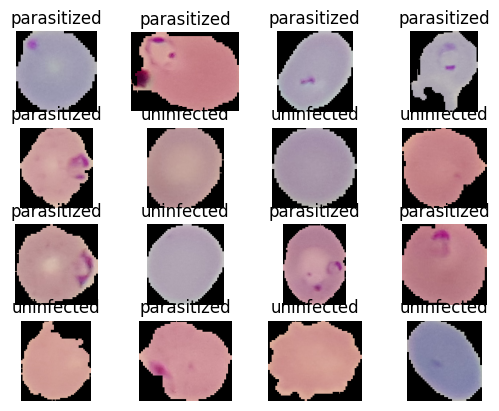

In [6]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

## Data Processing

In [7]:
IM_SIZE = 224
def resize_rescale(image, label):
    return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)

for image,label in train_dataset.take(1):
    print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [8]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Model Creation

In [17]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),
    
    Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    
    Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),
    
    Flatten(),
    
    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid'),
])

In [23]:
model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [24]:
history = model.fit(train_dataset, epochs = 10, verbose = 1)

Epoch 1/10


689/689 [==============================] - 28s 37ms/step - loss: 0.1688 - accuracy: 0.9436
Epoch 2/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1647 - accuracy: 0.9453
Epoch 3/10
689/689 [==============================] - 24s 35ms/step - loss: 0.1543 - accuracy: 0.9491
Epoch 4/10
689/689 [==============================] - 26s 38ms/step - loss: 0.1497 - accuracy: 0.9506
Epoch 5/10
689/689 [==============================] - 29s 42ms/step - loss: 0.1451 - accuracy: 0.9523
Epoch 6/10
689/689 [==============================] - 27s 39ms/step - loss: 0.1415 - accuracy: 0.9526
Epoch 7/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1359 - accuracy: 0.9544
Epoch 8/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1261 - accuracy: 0.9570
Epoch 9/10
689/689 [==============================] - 25s 36ms/step - loss: 0.1231 - accuracy: 0.9576
Epoch 10/10
689/689 [==============================] - 24s 35ms/step - loss: 0.1175 - accurac

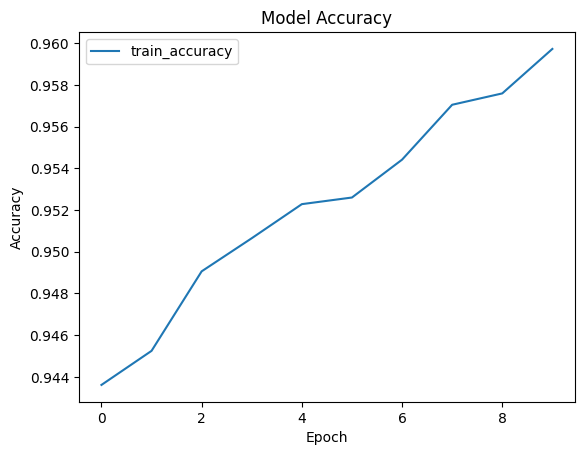

In [31]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy'])
plt.show()

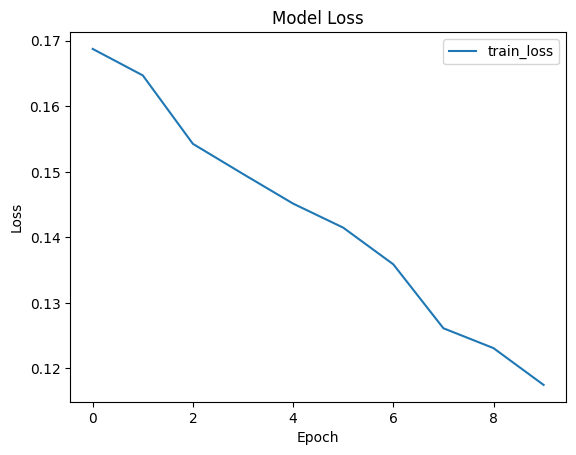

In [32]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss'])
plt.show()